In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
field = 'IDARADO2'

## Upload WCA file


In [3]:
df_wca = pd.read_csv('/home/dasxgo/developer/rock/WCA_2.csv')
data_major = 'OIL'
data_reservoir = 'WCA'
df_wca.insert(0, 'FIELD', field) 
df_wca.insert(1, 'MAJOR', data_major)
df_wca.insert(2, 'RESERVOIR', data_reservoir)
df_wca.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-05-01,1,31,369,256,521
1,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-06-01,2,30,9046,7205,13550
2,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-07-01,3,31,8277,9401,12466
3,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-08-01,4,31,8645,10927,13092
4,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-09-01,5,30,7093,10786,10800


## Upload WCB file

In [4]:
df_wcb = pd.read_csv('/home/dasxgo/developer/rock/WCB_2.csv')
data_major = 'OIL'
data_reservoir = 'WCB'
df_wcb.insert(0, 'FIELD', field) 
df_wcb.insert(1, 'MAJOR', data_major)
df_wcb.insert(2, 'RESERVOIR', data_reservoir)
df_wcb.head()


,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-05-01,1,31,2960,2731,6107
1,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-06-01,2,30,22900,20793,47279
2,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-07-01,3,31,23100,25215,47742
3,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-08-01,4,31,15346,23772,31752
4,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-09-01,5,30,12285,27857,25446


## Upload LSS file

In [5]:
df_lss = pd.read_csv('/home/dasxgo/developer/rock/LSS_2.csv')
data_major = 'OIL'
data_reservoir = 'LSS'
df_lss.insert(0, 'FIELD', field) 
df_lss.insert(1, 'MAJOR', data_major)
df_lss.insert(2, 'RESERVOIR', data_reservoir)
df_lss.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-06-01,1,30,31329,8505,75909
1,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-07-01,2,31,22055,18004,53596
2,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-08-01,3,31,18680,11996,45531
3,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-09-01,4,30,17455,9466,42671
4,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-10-01,5,31,26144,16693,64099


## **Flatflie**

In [6]:
df = pd.concat([df_lss,df_wca,df_wcb], ignore_index=True)
df['ProducingMonth'] = pd.to_datetime(df['ProducingMonth'])
df.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-06-01,1,30,31329,8505,75909
1,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-07-01,2,31,22055,18004,53596
2,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-08-01,3,31,18680,11996,45531
3,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-09-01,4,30,17455,9466,42671
4,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-10-01,5,31,26144,16693,64099


## Data according to plan



In [7]:
def calculate_production_values(df, well_planned):
    production_columns = ['LiquidsProd_BBL', 'GasProd_MCF', 'WaterProd_BBL']
    production_data = {}

    for column in production_columns:
        data = df[column] * (well_planned / df['LateralLength_FT']) * (30.4 / df['ProducingDays'])
        production_data[column] = data

    df[['OIL BBL', 'GAS MCF', 'WATER BBL']] = pd.DataFrame(production_data)

    # Convert columns to int64
    for column in production_columns:
        df[['OIL BBL', 'GAS MCF', 'WATER BBL']] = np.array(df[['OIL BBL', 'GAS MCF', 'WATER BBL']], np.int64)

    return df

well_planned = 5000
df = calculate_production_values(df, well_planned)
df.head()


/home/dasxgo/mambaforge/envs/rock/lib/python3.11/site-packages/pandas/core/generic.py:2070: RuntimeWarning: invalid value encountered in cast
  return np.asarray(self._values, dtype=dtype)


,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL,OIL BBL,GAS MCF,WATER BBL
0,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-06-01,1,30,31329,8505,75909,15226,4133,36892
1,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-07-01,2,31,22055,18004,53596,10373,8467,25207
2,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-08-01,3,31,18680,11996,45531,8785,5642,21414
3,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-09-01,4,30,17455,9466,42671,8483,4600,20738
4,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-10-01,5,31,26144,16693,64099,12296,7851,30147


## Type of Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FIELD             4810 non-null   object        
 1   MAJOR             4810 non-null   object        
 2   RESERVOIR         4810 non-null   object        
 3   API_UWI           4810 non-null   object        
 4   TVD_FT            4810 non-null   int64         
 5   LateralLength_FT  4810 non-null   int64         
 6   ENVOperator       4810 non-null   object        
 7   WellName          4810 non-null   object        
 8   ProducingMonth    4810 non-null   datetime64[ns]
 9   TotalProdMonths   4810 non-null   int64         
 10  ProducingDays     4810 non-null   int64         
 11  LiquidsProd_BBL   4810 non-null   int64         
 12  GasProd_MCF       4810 non-null   int64         
 13  WaterProd_BBL     4810 non-null   int64         
 14  OIL BBL           4810 n

## **Data Cleansing**

## Check errors


In [16]:
check = 'OIL BBL'

df[df[check] == 0].count() + df[df[check] < 0].count() 


FIELD               41
MAJOR               41
RESERVOIR           41
API_UWI             41
TVD_FT              41
LateralLength_FT    41
ENVOperator         41
WellName            41
ProducingMonth      41
TotalProdMonths     41
ProducingDays       41
LiquidsProd_BBL     41
GasProd_MCF         41
WaterProd_BBL       41
OIL BBL             41
GAS MCF             41
WATER BBL           41
dtype: int64

## Cleanning Data


In [17]:
cols = ["OIL BBL", "GAS MCF", "WATER BBL"]
for col in cols:
    
    df.drop(df[(df["OIL BBL"] == 0) | (df["OIL BBL"] < 0)].index, inplace = True)
    df.drop(df[(df["GAS MCF"] == 0) | (df["GAS MCF"] < 0)].index, inplace = True)
    df.drop(df[(df["WATER BBL"] == 0) | (df["WATER BBL"] < 0)].index, inplace = True)

## Check cleanning

In [20]:
cleansed = 'OIL BBL'

df[df[cleansed] == 0].count() + df[df[cleansed] < 0].count()

FIELD               0
MAJOR               0
RESERVOIR           0
API_UWI             0
TVD_FT              0
LateralLength_FT    0
ENVOperator         0
WellName            0
ProducingMonth      0
TotalProdMonths     0
ProducingDays       0
LiquidsProd_BBL     0
GasProd_MCF         0
WaterProd_BBL       0
OIL BBL             0
GAS MCF             0
WATER BBL           0
dtype: int64

## **Check Fatflie / Data Okay**

In [21]:
df.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL,OIL BBL,GAS MCF,WATER BBL
0,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-06-01,1,30,31329,8505,75909,15226,4133,36892
1,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-07-01,2,31,22055,18004,53596,10373,8467,25207
2,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-08-01,3,31,18680,11996,45531,8785,5642,21414
3,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-09-01,4,30,17455,9466,42671,8483,4600,20738
4,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-10-01,5,31,26144,16693,64099,12296,7851,30147


In [22]:
df_lss = df[df['RESERVOIR'] == "LSS"]
df_wsb = df[df['RESERVOIR'] == "WCB"]
df_wca = df[df['RESERVOIR'] == "WCA"]

In [23]:
well_max = df_lss.groupby('WellName').agg({'OIL BBL':["max"]})
well_max

,OIL BBL
,max
WellName,
CAFFEY-CHIEFTAIN 3229A 1HL,13668
CAFFEY-CHIEFTAIN 3229C 3HL,16988
CAFFEY-CHIEFTAIN 3229D 4HL,16847
DARK STAR UNIT 1 2121SH,15237
DARK STAR UNIT 1 2123SH,12428
DARK STAR UNIT 1 2124SH,9731
DARK STAR UNIT 2 2125SH,14638
DARK STAR UNIT 2 2127SH,13704


In [24]:
well_max.describe()

,OIL BBL
,max
count,48.000000
mean,13643.270833
std,4648.065311
min,5261.000000
25%,9979.250000
50%,13704.000000
75%,16933.250000
max,23555.000000


In [25]:
df_vis = df_lss[['WellName', 'TotalProdMonths', 'OIL BBL']]
df_vis

,WellName,TotalProdMonths,OIL BBL
0,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,1,15226
1,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2,10373
2,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,3,8785
3,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,4,8483
4,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,5,12296
...,...,...,...
1621,TEXACO-MCMURRY 3244B 2HL,4,7581
1622,TEXACO-MCMURRY 3244B 2HL,5,6520
1623,DIRE WOLF UNIT 2 0427SH,1,3626
1624,DIRE WOLF UNIT 2 0427SH,2,6844


In [26]:
df_vis.loc[df_vis["TotalProdMonths"] <= 1, 'OIL BBL'] =  23555.000000
df_vis

,WellName,TotalProdMonths,OIL BBL
0,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,1,23555
1,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2,10373
2,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,3,8785
3,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,4,8483
4,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,5,12296
...,...,...,...
1621,TEXACO-MCMURRY 3244B 2HL,4,7581
1622,TEXACO-MCMURRY 3244B 2HL,5,6520
1623,DIRE WOLF UNIT 2 0427SH,1,23555
1624,DIRE WOLF UNIT 2 0427SH,2,6844


In [27]:
df_vis.loc[df_vis["TotalProdMonths"] <= 1, 'TotalProdMonths'] =  0
df_vis

,WellName,TotalProdMonths,OIL BBL
0,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,0,23555
1,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2,10373
2,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,3,8785
3,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,4,8483
4,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,5,12296
...,...,...,...
1621,TEXACO-MCMURRY 3244B 2HL,4,7581
1622,TEXACO-MCMURRY 3244B 2HL,5,6520
1623,DIRE WOLF UNIT 2 0427SH,0,23555
1624,DIRE WOLF UNIT 2 0427SH,2,6844


## Oil Average curve Visualization

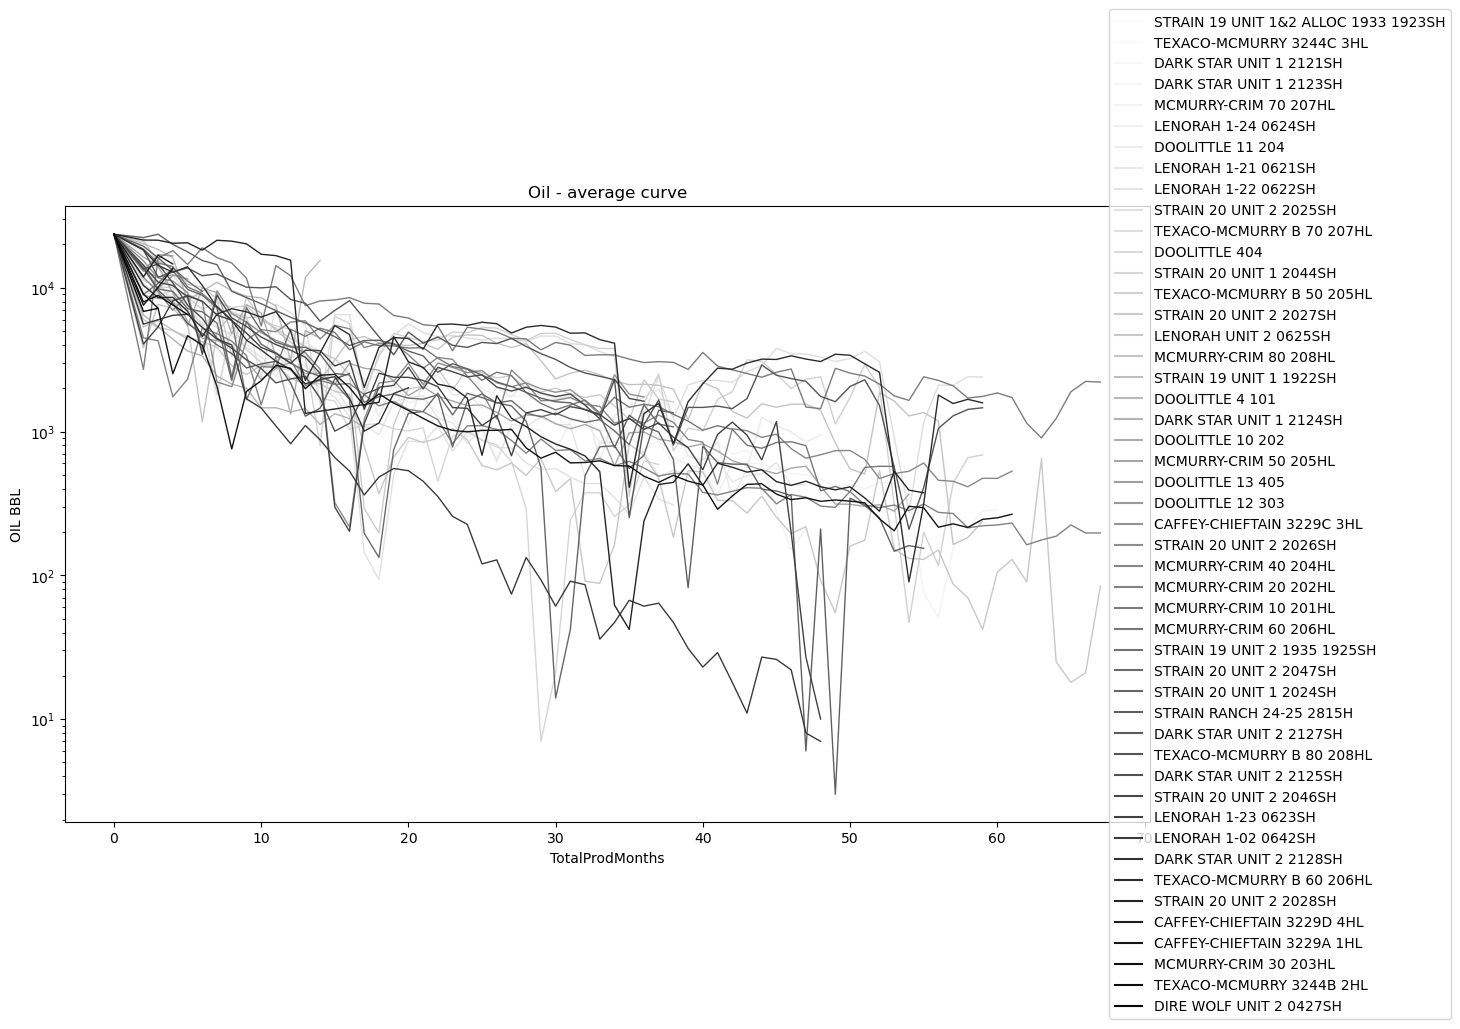

In [28]:
data = df_vis
x = 'TotalProdMonths'
y = "OIL BBL"

plt.figure(figsize=(14,8))
plt.yscale('log')
plt.title("Oil - average curve")
plt.xlabel("TotalProdMonths")
plt.ylabel("OIL BBL")
sns.lineplot(data=df_vis, x="TotalProdMonths", y="OIL BBL", hue="WellName", palette='Greys', 
estimator=None, n_boot=1000, lw=1, orient='x', sort=True, legend='auto', ci='deprecated', ax=None)
plt.legend(loc='center', bbox_to_anchor=(1.12,0.5))
plt.show()

## Normalization

In [29]:
df_vis['OIL BBL']

0       23555
1       10373
2        8785
3        8483
4       12296
        ...  
1621     7581
1622     6520
1623    23555
1624     6844
1625     7187
Name: OIL BBL, Length: 1578, dtype: int64

In [30]:
df_lss['OIL BBL'].describe()

count     1578.000000
mean      3538.261090
std       4009.696064
min          3.000000
25%        853.250000
50%       2080.000000
75%       4546.000000
max      23555.000000
Name: OIL BBL, dtype: float64

## Method min-max

/tmp/ipykernel_289/2496776055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vis['OIL BBL'] = (df_vis['OIL BBL']-df_vis['OIL BBL'].min()) / (df_vis['OIL BBL'].max()-df_vis['OIL BBL'].min())


(array([226., 194., 172., 167., 150., 102.,  92., 110.,  94., 271.]),
 array([0.        , 0.09999092, 0.19998184, 0.29997276, 0.39996368,
        0.4999546 , 0.59994552, 0.69993644, 0.79992736, 0.89991828,
        0.9999092 ]),
 <BarContainer object of 10 artists>)

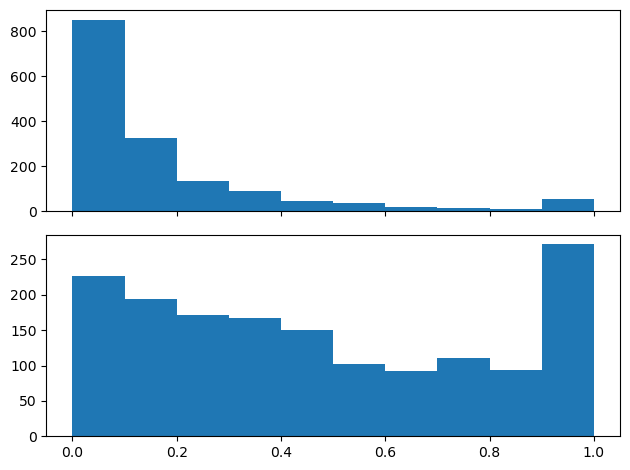

In [31]:
df_vis['OIL BBL'] = (df_vis['OIL BBL']-df_vis['OIL BBL'].min()) / (df_vis['OIL BBL'].max()-df_vis['OIL BBL'].min())
p = 0.2

fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True)

axs[0].hist(df_vis['OIL BBL'])
axs[1].hist(df_vis['OIL BBL'].apply(lambda x : np.tanh(x/p)))


<AxesSubplot: xlabel='OIL BBL'>

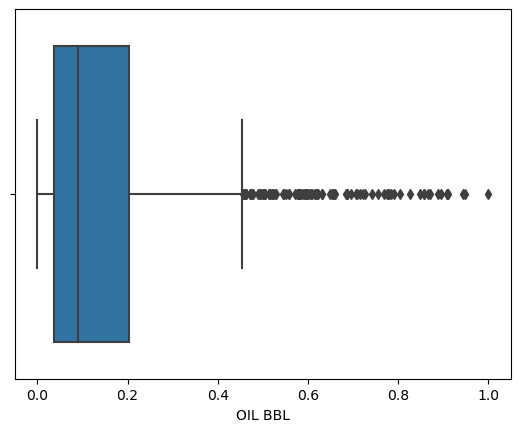

In [72]:
sns.boxplot(x=df_vis['OIL BBL'])

## Maximum production peak

In [32]:
df_vis.describe()

,TotalProdMonths,OIL BBL
count,1578.000000,1578.000000
mean,24.783904,0.171780
std,16.911972,0.220556
min,0.000000,0.000000
25%,10.000000,0.036366
50%,23.000000,0.089801
75%,37.000000,0.203688
max,67.000000,1.000000
